In [ ]:
!unxz gutenberg_poems_clean.txt.xz

In [1]:
text = open('gutenberg_poems_clean.txt', encoding = 'utf-8').read()

In [57]:
import nltk
import matplotlib.pyplot as plt
from collections import OrderedDict, defaultdict, Counter
import regex as re
from math import log
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import matplotlib.ticker as ticker
nltk.download('wordnet')

def get_characters(t):
    yield from t

def get_words(t):
  for m in re.finditer(r'[\p{L}0-9\*]+', t):
     yield m.group(0)

def freq_list(g, top=None):
  c = Counter(g)
  if top is None:
     items = c.items()
  else:
     items = c.most_common(top)
  return OrderedDict(sorted(items, key=lambda t: -t[1]))

def log_rang_log_freq(name, g):
   freq = freq_list(g)
   plt.figure().clear()
   #plt.figure(figsize=(12, 4))
   plt.plot([log(x) for x in range(1, len(freq.values())+1)], [log(y) for y in freq.values()])
   fname = f'{name}.png'
   plt.savefig(fname)
   return fname

def get_top_word_length(g, top=10):
    d = defaultdict(set)
    for item in g:
        d[len(item)].add(item)
    return {k : sorted(list(v)) for k, v in sorted(d.items(), reverse=True)[:top]}

def ngrams(g, size):
  ngram = []
  for item in g:
     ngram.append(item)
     if len(ngram) == size:
        yield tuple(ngram)
        ngram = ngram[1:]

def lemmas(g):
    lemmatizer = WordNetLemmatizer()
    for item in g:
        yield lemmatizer.lemmatize(item)

def stems(g):
    stemmer = SnowballStemmer('english')
    for item in g:
        yield stemmer.stem(item)

def get_freq_list(g):
    c = Counter(g)
    freq_list = list(enumerate(sorted([(word, freq) for word, freq in c.items()], reverse=True, key=lambda t: t[1]), start=1))
    return freq_list

def find_long_popular_words(g, top=None):
    freq_list = get_freq_list(g)
    len_vs_freq = sorted([(freq * len(word), word) for rank, (word, freq) in freq_list], reverse=True, key=lambda t: t[0])
    if top is None:
        return len_vs_freq
    else:
        return len_vs_freq[:top]

def plot_brevity_law(g):
    freq_list = get_freq_list(g)
    plt.figure().clear()
    #plt.figure(figsize=(12, 4))
    x = [tup[0] for tup in freq_list]
    y = [len(tup[1][0]) for tup in freq_list]
    plt.plot(x[::5000], y[::5000])
    plt.xlabel('Word rank (every 5000th)')
    plt.ylabel('Word length (every 5000th)')
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x))
    fname = 'brevity_law_plot.png'
    plt.savefig(fname)

def plot_heaps_law(g):
    uniq_words = set()
    text_length = 0
    x = []
    y = []
    for word in g:
        text_length += 1
        uniq_words.add(word)
        x.append(text_length)
        y.append(len(uniq_words))
    plt.figure().clear()
    #plt.figure(figsize=(12, 4))
    plt.xlabel('Text length (in words)')
    plt.ylabel('Unique words')
    plt.ticklabel_format(scilimits=(-5, 8))
    plt.plot(x, y)
    plt.savefig('heaps_law_plot.png')

[nltk_data] Downloading package wordnet to /home/ked/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
# Top 10 longest words
toplist = get_top_word_length(get_words(text))
for k,v in toplist.items():
    print(f"{k}: {', '.join(v)}")

43: ninepenceashillingneteighteenpencetwoandsix
36: crownnettwoandeightpencethreeandnine
35: Lebensfeuerversicherunggesellschaft
33: Gottsdonnerkreuzschockschwerenoth
28: Wintztschitstopschinzoudhoff
25: Selbstanschauungsvermogen
24: Aldiborontiphoscophornio, WappenshieldWaffenschild, WunderscheenWunderschoen
22: honorificabilitudinity
21: Voelkerwanderungszeit
20: Alliterationspoesien, Fornminnesfoerenings, Retrogradeacompletes, andkindlystepthisway, richardwashburnchild, xinechoncentlalizqui


'zipf_plot_words.png'

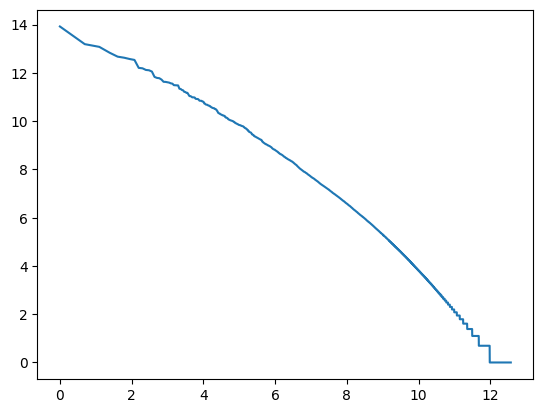

In [66]:
# Zipf's law plot for words
log_rang_log_freq('zipf_plot_words', get_words(text))

# Zbadać prawo Zipfa dla innych jednostek niż wyrazy (n-gramy, rdzenie, lematy, itp.)

'zipf_plot_ngrams.png'

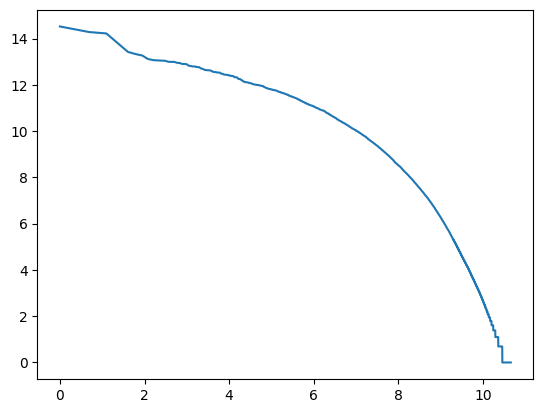

In [59]:
# Zipf's law plot for n-grams
log_rang_log_freq('zipf_plot_ngrams', ngrams(get_characters(text), 3))

'zipf_plot_lemmas.png'

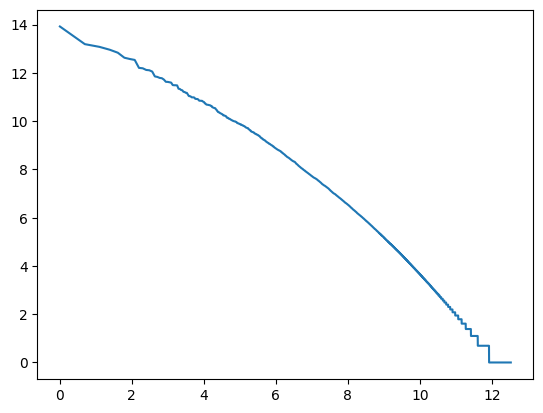

In [60]:
# Zipf's law plot for lemmas
log_rang_log_freq('zipf_plot_lemmas', lemmas(get_words(text)))

'zipf_plot_stems.png'

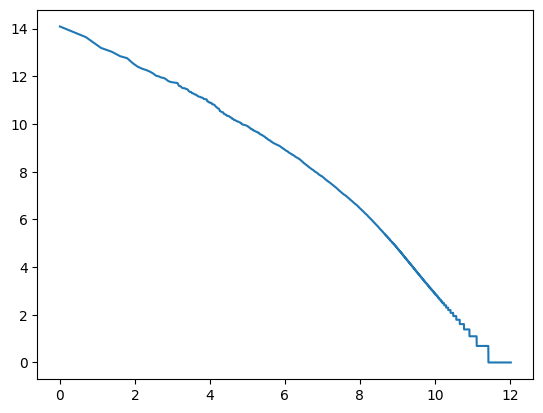

In [61]:
# Zipf's law plot for stems
log_rang_log_freq('zipf_plot_stems', stems(get_words(text)))

# Podać słowa, które najbardziej łamią prawo wiążące długość z częstością

In [63]:
# Words which violate the length-frequency law the most (highest frequency to length ratio)
toplist = find_long_popular_words(get_words(text), top=10)
print('Word\t\tfrequency * length')
print('-'*30)
for i in range(len(toplist)):
    print(f'{i + 1}. {toplist[i][1]}\t\t\t{toplist[i][0]}')

Word		frequency * length
------------------------------
1. the			3346731
2. and			1609434
3. of			958674
4. And			916899
5. to			752068
6. that			726440
7. with			688892
8. The			602034
9. in			579134
10. his			552441


# Wymyślić i zbadać 2 zależności dotyczące wyrazów bądź innych jednostek w tekście

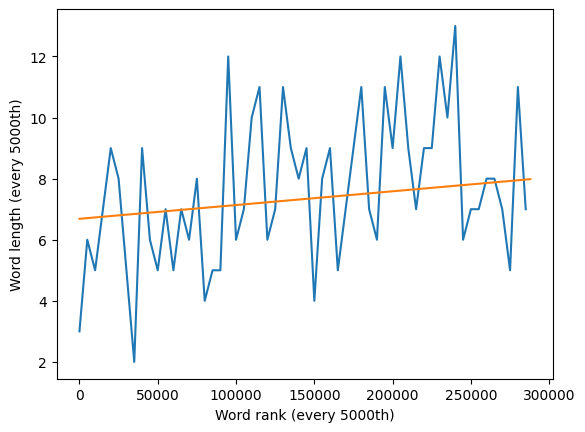

In [64]:
# Brevity law
# https://en.wikipedia.org/wiki/Brevity_law
plot_brevity_law(get_words(text))

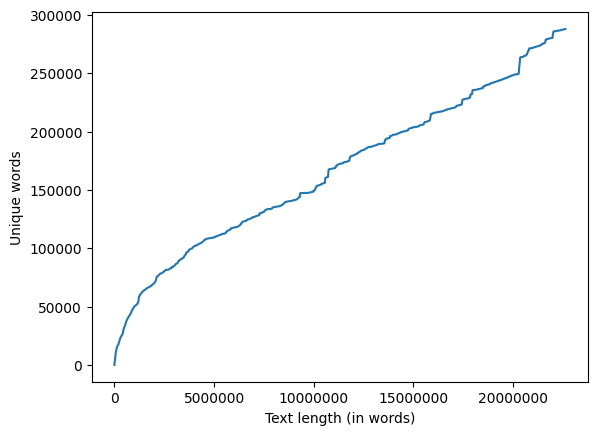

In [65]:
# Heaps' law
# https://en.wikipedia.org/wiki/Heaps'_law
plot_heaps_law(get_words(text))